# Random Forest

In [3]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



# 1. Assignment 1 - Ensemble methods

This assignment concerns training and analyzing random forests. 

### 1.1 - Random forest for y = x1<x2

In this section we create 1000 training data sets, each containing 100 observations with three variables. X1 and X2 are generated as random numbers from the uniform distribution with boundaries 0 and 1. Y is then created as a categorical variable based on X1 and X2 with two values; one when X1<X2 and one when X1=>X2. In total three random forests are learned on each training set, one with 1 tree, one with 10 trees and one with 100 trees. The training data sets are created with the following code:

[1] 0.206499 0.136958 0.113668


[1] 0.0030611071 0.0010342585 0.0009186224

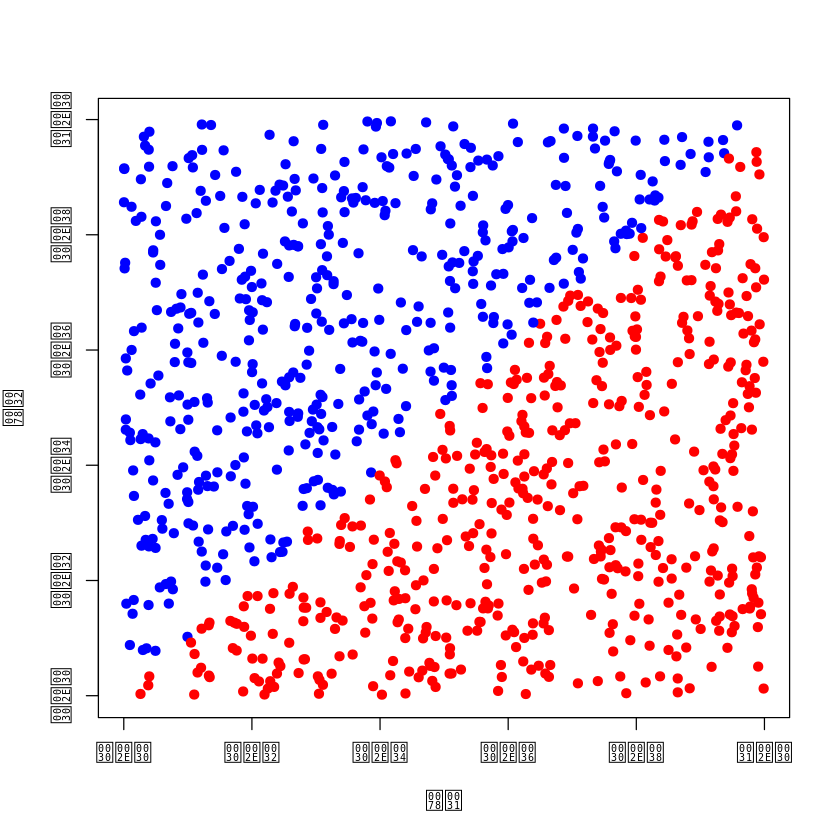

In [4]:
# dataset <- list(x=0,y=0) #creating a list of list

set.seed(12345)

#creating training data
dataset=list(list())
for (i in 1:1000) {
  x1<-runif(100)
  x2<-runif(100)
  trdata<-cbind(x1,x2)
  y<-as.numeric(x1<x2)
  #y = ifelse(x1<x2,yes = "1",no = "0")
  trlabels<-as.factor(y)
  dataset[[i]] =list(x=trdata,y=trlabels) 
}

#creating test set

set.seed(1234)
x1<-runif(1000)
x2<-runif(1000)
tedata<-cbind(x1,x2)
y<-as.numeric(x1<x2)
telabels<-as.factor(y)
plot(x1,x2,col=c('red',"blue")[telabels],pch=19)

#Random Forest Models
#creating a nested list to save the result for the 1000s datasets when ntree =  c(1,10,100)

tree = c(1,10,100)
 
forest = list(list(list()))

set.seed(12345)
for (i in 1:1000) {
  
  forest[[i]] = list() #bcz I didn't specify the length at the beginning, first I create a list for it!
  for (n in 1:3) {
    
    forest[[i]][[n]] = randomForest(y=dataset[[i]]$y,
                                    x=dataset[[i]]$x,
                                    ntree = tree[n],
                                    nodesize = 25,
                                    keep.forest = TRUE,
                                    xtest = tedata,
                                    ytest = telabels)
  }
}
error.1.tree = numeric(1000)
error.10.tree = numeric(1000)
error.100.tree = numeric(1000)
#calculating errors
for (i in 1:1000) {
  
  error.1.tree[i] = forest[[i]][[1]]$test$err.rate[1]
   error.10.tree[i] = forest[[i]][[2]]$test$err.rate[10] #the 10th element is the error rate for ntree=10
   error.100.tree[i] = forest[[i]][[3]]$test$err.rate[100]   #the 100th element is the error rate for ntree=100 
}



mean.error.1 = mean(error.1.tree)

mean.error.10 = mean(error.10.tree)

mean.error.100 = mean(error.100.tree)
print(c(mean.error.1,mean.error.10,mean.error.100))

c(var(error.1.tree),var(error.10.tree),var(error.100.tree))

### 1.2 - Random forest for y = x1<0.5

In this section we repeat the steps taken in 1.1, but instead compute Y based on X1<0.5 instead. The new data is set up with the following code:

[1] 0.092144 0.016397 0.007048


[1] 1.677647e-02 6.196691e-04 9.943113e-05

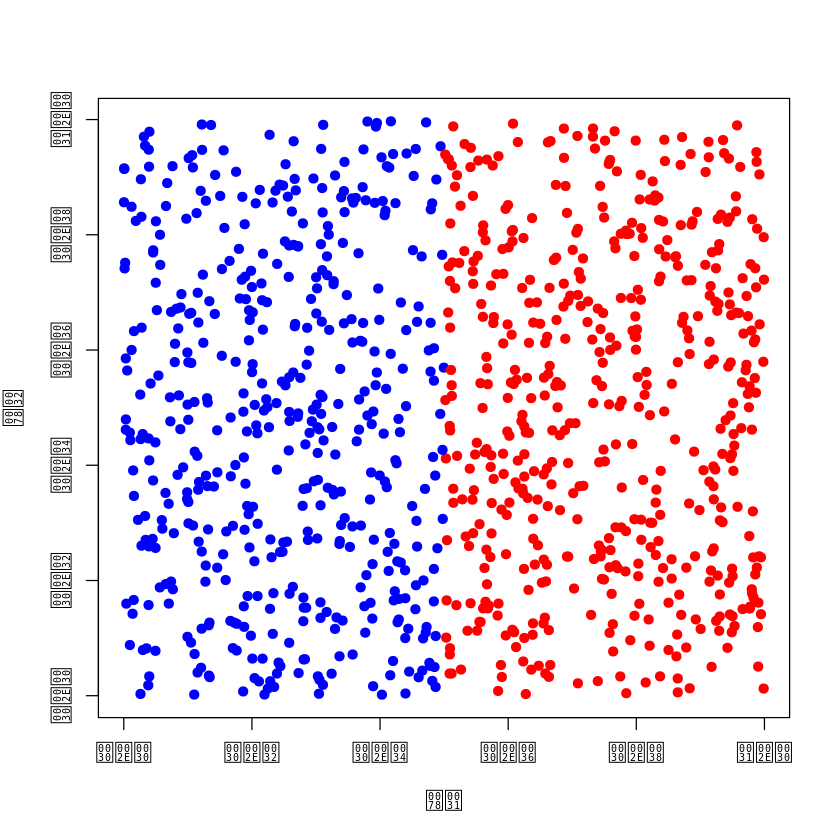

In [5]:
#exercise 1.b

# Generate 1000 data sets
dataset <- list(list(x=0,
                      y=0))
set.seed(12345)
for (set in 1:1000) {
  x1<-runif(100)
  x2<-runif(100)
  trdata<-cbind(x1,x2)
  y<-as.numeric(x1<0.5)
  trlabels<-as.factor(y)
  
  dataset[[set]] <- list(x=trdata,
                          y=trlabels)
}


# Test data
set.seed(1234)
x1<-runif(1000)
x2<-runif(1000)
tedata<-cbind(x1,x2)
y<-as.numeric(x1<0.5)
telabels<-as.factor(y)
plot(x1,x2,col=c('red',"blue")[telabels],pch=19)


trees <- c(1,10,100)
forests_two <- list(list(list()))
set.seed(12345)
for (set in 1:1000) {
  forests_two[[set]] <- list()
  for (ntrees in 1:3) {
    forests_two[[set]][[ntrees]] <- randomForest(x = dataset[[set]]$x, 
                                                 y = dataset[[set]]$y,
                                                 xtest = tedata,
                                                 ytest = telabels, 
                                                 ntree = trees[ntrees],
                                                 nodesize = 25,
                                                 keep.forest = TRUE)
  }
}


error2.1.tree = numeric(1000)
error2.10.tree = numeric(1000)
error2.100.tree = numeric(1000)
for (i in 1:1000) {
  
  error2.1.tree[i] = forests_two[[i]][[1]]$test$err.rate[1]
  error2.10.tree[i] = forests_two[[i]][[2]]$test$err.rate[10] #the 10th element is the error rate for ntree=10
  error2.100.tree[i] = forests_two[[i]][[3]]$test$err.rate[100]   #the 100th element is the error rate for ntree=100 
}

mean.error2.1 = mean(error2.1.tree)

mean.error2.10 = mean(error2.10.tree)

mean.error2.100 = mean(error2.100.tree)
print(c(mean.error2.1,mean.error2.10,mean.error2.100))
c(var(error2.1.tree),var(error2.10.tree),var(error2.100.tree))


As in the previous section both the mean and variance of the error rate goes down as the number of trees goes up.

### 1.3 - Random forest for y = x1<05 & x2<0.5 | x1>0.5 & x2>0.5

Once again we repeat the exercise, this time with Y computed based on x1<05 & x2<0.5 or x1>0.5 & x2>0.5. The data is set up with the following code:

[1] 0.250263 0.120546 0.075481

[1] 0.013511567 0.002977083 0.001216850

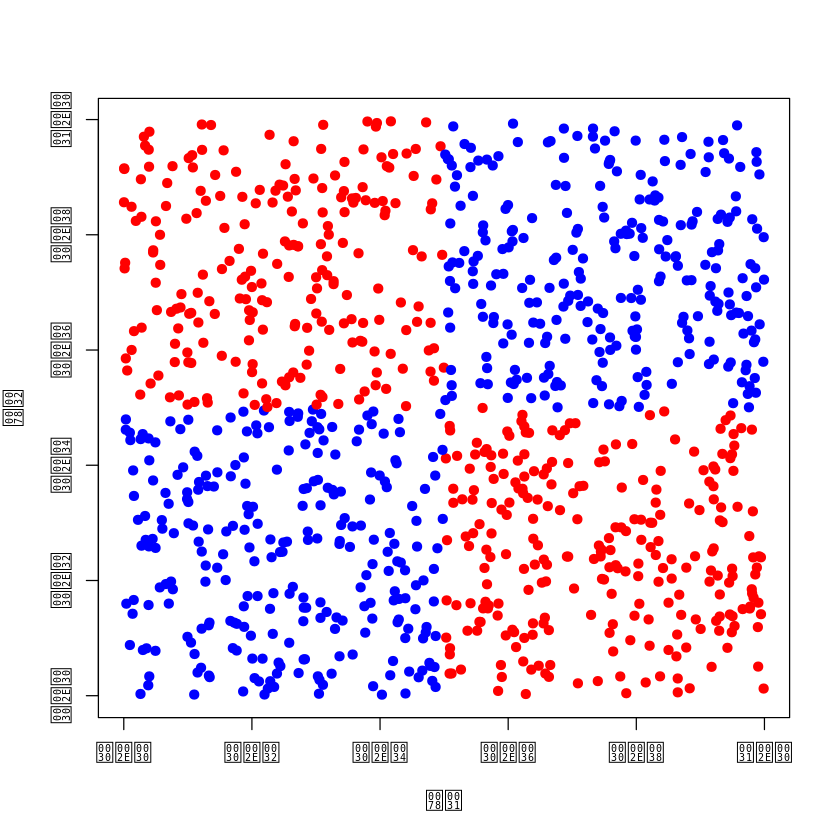

In [6]:
### 1.3 - Random forest for y = x1<05 & x2<0.5 | x1>0.5 & x2>0.5

# Once again we repeat the exercise, this time with Y computed based on x1<05 & x2<0.5 or x1>0.5 & x2>0.5. The data is set up with the following code:

# Generate 1000 data sets
datasets <- list(list(x=0,
                      y=0))
set.seed(12345)
for (set in 1:1000) {
  x1<-runif(100)
  x2<-runif(100)
  trdata<-cbind(x1,x2)
  y<-as.numeric((x1<0.5 & x2<0.5)|(x1>0.5 & x2>0.5))
  trlabels<-as.factor(y)
  
  datasets[[set]] <- list(x=trdata,
                          y=trlabels)
}

set.seed(1234)
x1<-runif(1000)
x2<-runif(1000)
tedata<-cbind(x1,x2)
y<-as.numeric((x1<0.5 & x2<0.5)|(x1>0.5 & x2>0.5))
telabels<-as.factor(y)
plot(x1,x2,col=c('red','blue')[telabels],pch=19)

#The random forests are then learned with the following code:

trees <- c(1,10,100)
forests_three <- list(list(list()))
set.seed(12345)
for (set in 1:1000) {
  forests_three[[set]] <- list()
  for (ntrees in 1:3) {
    forests_three[[set]][[ntrees]] <- randomForest(x = datasets[[set]]$x, 
                                                   y = datasets[[set]]$y,
                                                   xtest = tedata,
                                                   ytest = telabels, 
                                                   ntree = trees[ntrees],
                                                   nodesize = 12,
                                                   keep.forest = TRUE)
  }
}



errors_onetree_three <- 0
for (set in 1:1000) {
  errors_onetree_three[set] <- forests_three[[set]][[1]][["test"]][["err.rate"]][[1]] 
}

# Misclassification with 10 trees
errors_tentrees_three <- 0
for (set in 1:1000) {
  errors_tentrees_three[set] <- forests_three[[set]][[2]][["test"]][["err.rate"]][[10]] 
}

# Misclassification with 100 trees
errors_hundredtrees_three <- 0
for (set in 1:1000) {
  errors_hundredtrees_three[set] <- forests_three[[set]][[3]][["test"]][["err.rate"]][[100]] 
}

c(mean(errors_onetree_three), mean(errors_tentrees_three), mean(errors_hundredtrees_three))
c(var(errors_onetree_three), var(errors_tentrees_three), var(errors_hundredtrees_three))


Just as with the previous two datasets the mean and the variance of the error of the misclassification error goes down as the number of trees goes up.

### 1.4 - Questions

In this section we answer some questions on the topic of random forests.

**a) What happens with the mean and variance of the error rate when the number of trees in the random forest grows?**

Overall as the number of trees grows the mean and variance of the error rate goes down. 
  
  
**b) The third dataset represents a slightly more complicated classification problem than the first one. Still, you should get better performance for it when using sufficient trees in the random forest. Explain why you get better performance.**  

The reason why the performance improves when using more trees is because, even though the problem is a more complicated one, if the trees in general predict better than randomly guessing (error rate of 0.5) then as the number of trees increases they will on average achieve a better result. This is because the final decision for an observation is done by majority voting among the trees in the forest and so if the trees on average do better than random then a larger amount of trees will increase the chance that the majority of them voted for the right class. 
  
  Random forest also decorrelate the data. Random forest consider only a subset of the predictors at each split. 
  
 overall,  the more the number of tree the more predictor we have considered and this helps to find the correct most important feature in the data.
  
**c) Why is it desirable to have low error variance?**  
 a model with low variance is more robust and result in lower test error rate and generalizes better.
Low error variance means that a larger amount of the trees in the forest predict correct and incorrect values for the test set at a similar rate. This is desirable as it suggests that the individual trees are not overfitted on their respective training set, which if it were the case would lead to a larger variance as each tree is more dependent on the data it used for training and as such more often return different predictions for the same observation in the test set.


# Extra note about Random Forest

Desision Tree suffer from High Variance .!the variance of the error and the variance of the prediction compared with the average individual predictor reduces with Bagging.. In any case, we can prove (using Jensen's inequality) that the bagging predictor never has greater error than the average individual predictor(in regression case.)

Linear Regression Models tends to have low Variance on distinct datasets if n/p is large.

Bootstrap or aggregation a general-purpose procedure to reduce variance of statistical model.

Recall that given a set of n independent observations $Z_{1} , . . . , Z{_n}$ , each
with variance $\sigma$ , the variance of the mean Z̄ of the observations is given
by $\sigma^{2}/n$. 
IN other words: averaging a set of observations reduces the variance.

 To apply bagging to regression
trees, we simply construct B regression trees using B bootstrapped training
sets, and average the resulting predictions. These trees are grown deep,
and are not pruned. Hence each individual tree has high variance, but
low bias. Averaging these B trees reduces the variance.

Bagging for classification
 we can record the class predicted by each of the B trees, and
take a majority vote: 

### note:


 the key to bagging is that trees are
repeatedly fit to bootstrapped subsets of the observations. One can show
that on average, each bagged tree makes use of around two-thirds of the
observations.The remaining one-third of the observations not used to fit a
given bagged tree are referred to as the out-of-bag (OOB) observations.We
out-of-bag
can predict the response for the ith observation using each of the trees in which that observation was OOB. This will yield around B/3 predictions
for the ith observation. In order to obtain a single prediction for the ith
observation, we can average these predicted responses (if regression is the
goal) or can take a majority vote (if classification is the goal).

- bagging improves prediction accuracy at the expense of interpret ability.

### Random Forest Property

decorrelates the trees.  But when building these
decision trees, each time a split in a tree is considered, a random sample of
m predictors is chosen as split candidates from the full set of p predictors.
The split is allowed to use only one of those m predictors. A fresh sample of

m predictors is taken at each split, and typically we choose m ≈ sqrt(p) = √p


### Why Random Forest work?

 Suppose that there is one very strong predictor in the data set, along with a num-
ber of other moderately strong predictors. Then in the collection of bagged
trees, most or all of the trees will use this strong predictor in the top split.
Consequently, all of the bagged trees will look quite similar to each other.
Hence the predictions from the bagged trees will be highly correlated. Un-
fortunately, averaging many highly correlated quantities does not lead to
as large of a reduction in variance as averaging many uncorrelated quanti-
ties. In particular, this means that bagging will not lead to a substantial
reduction in variance over a single tree in this setting.
Random forests overcome this problem by forcing each split to consider
only a subset of the predictors. Therefore, on average (p − m)/p of the
splits will not even consider the strong predictor, and so other predictors
will have more of a chance. We can think of this process as decorrelating
the trees, thereby making the average of the resulting trees less variable
and hence more reliable.



As with bagging, random forests will not overfit if we increase
B, so in practice we use a value of B sufficiently large for the error rate to
have settled down.






# Variance of Bagging

We saw that bagging reduces the error, the variance of the error and the variance of the prediction compared with the average individual predictor. These results build on some assumptions that may not hold in practice. However, the assumptions almost hold in many domains and, thus, the mentioned reductions typically occur in practice, although they may be smaller than what theory says. For instance, the error may decrease by a factor smaller than B because the individual predictors' errors may be correlated. In any case, we can prove (using Jensen's inequality) that the bagging predictor never has greater error than the average individual predictor. Unfortunately, this is not true for classification, as the following example shows. Assume a set of predictors for binary classification. Each of them makes an error with probability 0.6. Then, the bagging classifier will make an error with probability 1, because we expect 60 % of the individual predictors to vote for the wrong label and, thus, the bagging classifier will always predict the wrong label, because it predicts the label in the majority. So, the bagging classifier performs worse than the average individual classifier.

The example above is quite unrealistic, because it builds on classifiers than perform worse than a random classifier (that has an error rate of 0.5). Luckily, when the error rate of the individual classifiers is below 0.5 (which is what typically happens in practice), bagging is beneficial. To see this, assume that the individual classifiers have all error rate e (<0.5). Then, each of them classifies an instance x correctly with probability 1-e. Then, the number S of individual classifiers that correctly classify x follow a Binomial(B,1-e) distribution. We are interested in the probability p(S>B/2), i.e. the probability that at least half of the individual classifiers classify x correctly. Why ? because the bagging classifier classifies according to majority voting. So, if the majority is right then the bagging classifier will be right. We can prove that p(S>B/2) goes to 1 when B grows. So, the probability of the bagging classifier classifying correctly goes to 1 as B grows. Again, this result builds on some assumptions (the individual classifiers are independent and all have the same error rate) which may only hold approximately in practice. So, we should not expect the bagging classifier to classify every instance correctly. It is more reasonable to expect the bagging classifier to simply outperform the average individual classifier.

___________________________________________________________________________________________________